## Generate Embeddings From Time Series VitalSigns

### Import Packages

In [57]:
import sys
import warnings
sys.path.append("../")
warnings.filterwarnings("ignore")

from data_class import patient, vitalsigns_name
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

### Data Loading

In [58]:
subject_id = 10011365
with open("./sample_patient/%s.pkl"%(subject_id), "rb") as f:
    data = pickle.load(f)
vitalsigns = data.vitalsigns
print(vitalsigns)
vitalsigns_items = vitalsigns.groupby(by = "itemid")

     itemid  value  delta_hrs
0    220045  102.0   0.500000
1    220210   26.0   0.516667
2    220277  100.0   0.533333
3    220180   46.0   0.550000
4    220179  124.0   0.550000
..      ...    ...        ...
171  220045  112.0  23.950000
172  220277   95.0  23.950000
173  220210   23.0  23.950000
174  220180   46.0  23.966667
175  220179  119.0  23.966667

[176 rows x 3 columns]


Text(0.5, 41.99999999999994, 'hours')

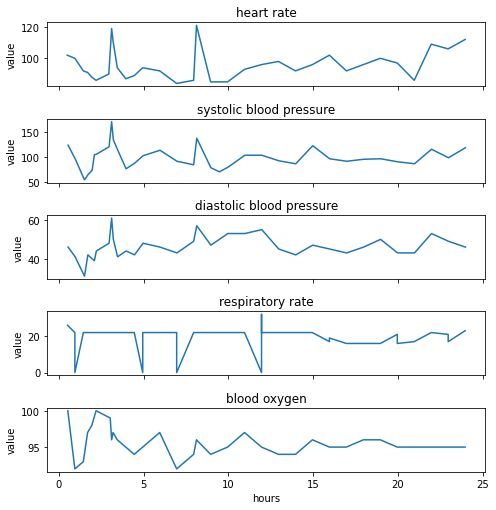

In [59]:
fig, ax = plt.subplots(len(vitalsigns_items), figsize = (7,7), sharex = True)
event_dict = {}
for ax_i, (itemid, sub_df) in enumerate(vitalsigns_items):
    item_name = vitalsigns_name[itemid]
    event_dict[item_name.replace(" ","_")] = sub_df.value.values
    ax[ax_i].plot(sub_df.delta_hrs, sub_df.value)
    ax[ax_i].set_title(item_name)
    ax[ax_i].set_ylabel("value")
plt.tight_layout()
plt.xlabel("hours")

### Time Series VitalSigns embedding extraction¶

In [60]:
def get_ts_emb(event_dict):
    ts_emb = {}
    #Compute the following features
    for event, series  in event_dict.items():
        if len(series) >0: #if there is any event
            ts_emb[event+'_max'] = np.max(series)
            ts_emb[event+'_min'] = np.min(series)
            ts_emb[event+'_mean'] = np.mean(series)
            ts_emb[event+'_variance'] = np.var(series)
            diff = np.diff(series)
            ts_emb[event+'_meandiff'] = np.mean(diff)#average change
            ts_emb[event+'_meanabsdiff'] = np.mean(np.abs(diff))
            ts_emb[event+'_maxdiff'] = np.max(np.abs(diff))
            ts_emb[event+'_sumabsdiff'] = np.sum(np.abs(diff))
            ts_emb[event+'_diff'] = series[-1]-series[0]
            #Compute the n_peaks
            peaks,_ = find_peaks(series) #, threshold=series.median()
            ts_emb[event+'_npeaks'] = len(peaks)
            #Compute the trend (linear slope)
            if len(series)>1:
                ts_emb[event+'_trend']= np.polyfit(np.arange(len(series)), series, 1)[0] #fit deg-1 poly
            else:
                 ts_emb[event+'_trend'] = 0
    return ts_emb

ts_embedding = get_ts_emb(event_dict)
print(ts_embedding)

{'heart_rate_max': 121.0, 'heart_rate_min': 84.0, 'heart_rate_mean': 96.0909090909091, 'heart_rate_variance': 91.96143250688706, 'heart_rate_meandiff': 0.3125, 'heart_rate_meanabsdiff': 8.25, 'heart_rate_maxdiff': 36.0, 'heart_rate_sumabsdiff': 264.0, 'heart_rate_diff': 10.0, 'heart_rate_npeaks': 7, 'heart_rate_trend': 0.17747326203208505, 'systolic_blood_pressure_max': 171.0, 'systolic_blood_pressure_min': 55.0, 'systolic_blood_pressure_mean': 100.0, 'systolic_blood_pressure_variance': 501.2, 'systolic_blood_pressure_meandiff': -0.14705882352941177, 'systolic_blood_pressure_meanabsdiff': 19.5, 'systolic_blood_pressure_maxdiff': 59.0, 'systolic_blood_pressure_sumabsdiff': 663.0, 'systolic_blood_pressure_diff': -5.0, 'systolic_blood_pressure_npeaks': 7, 'systolic_blood_pressure_trend': -0.009243697478992348, 'diastolic_blood_pressure_max': 61.0, 'diastolic_blood_pressure_min': 31.0, 'diastolic_blood_pressure_mean': 46.23529411764706, 'diastolic_blood_pressure_variance': 31.9446366782007